In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Load data
# Path relative to notebook location (notebooks/ -> project root -> data/raw)
data_file = Path("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv").resolve()
print(f"Loading data from: {data_file}")
print(f"File exists: {data_file.exists()}")

df = pd.read_csv(data_file)

print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

df.head()

Loading data from: /Users/anojanyogenthiran/Projects/churn-prediction/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv
File exists: True
Dataset shape: (7043, 21)
Memory usage: 6.82 MB


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Dataset info
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)
df.info()

print("\n" + "=" * 50)
print("SUMMARY STATISTICS")
print("=" * 50)
df.describe()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


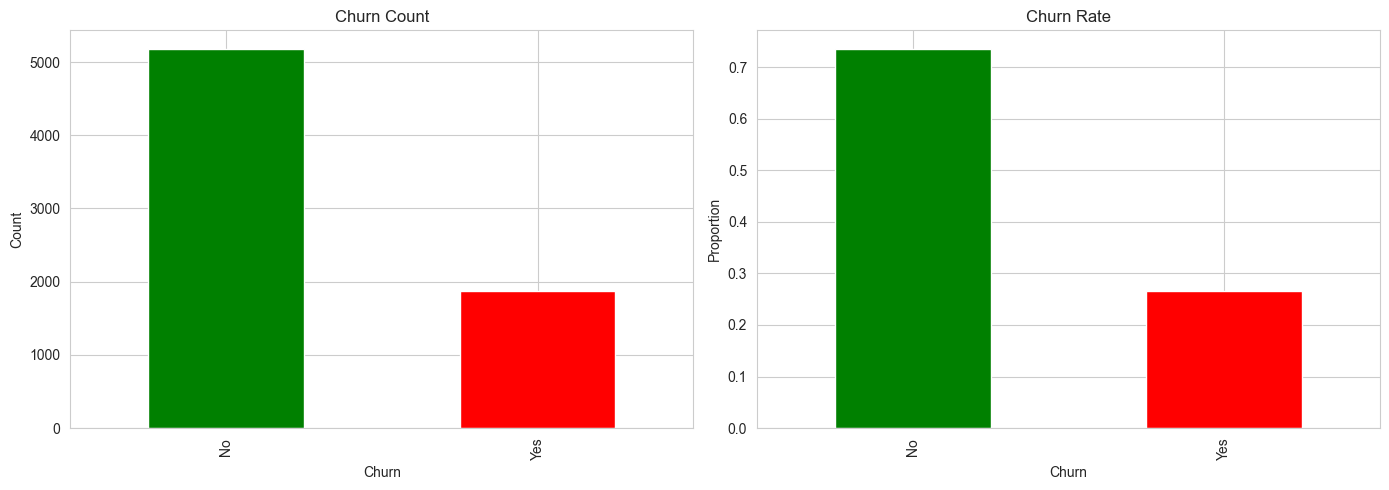

In [ ]:
# Check target variable
print("Churn Distribution:")
print(df['Churn'].value_counts())
print("\nChurn Rate:")
print(df['Churn'].value_counts(normalize=True))

# Visualize
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

df['Churn'].value_counts().plot(kind='bar', ax=ax[0], color=['green', 'red'])
ax[0].set_title('Churn Count')
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('Count')

df['Churn'].value_counts(normalize=True).plot(kind='bar', ax=ax[1], color=['green', 'red'])
ax[1].set_title('Churn Rate')
ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [ ]:
# Check missing values
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("Missing Values:")
    print(missing_df)
else:
    print("✅ No missing values!")

✅ No missing values!


In [ ]:
# Check data types
print("Data Types:")
print(df.dtypes.value_counts())

print("\n" + "=" * 50)
print("Numerical Columns:")
print(df.select_dtypes(include=['int64', 'float64']).columns.tolist())

print("\nCategorical Columns:")
print(df.select_dtypes(include=['object']).columns.tolist())

Data Types:
object     18
int64       2
float64     1
Name: count, dtype: int64

Numerical Columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges']

Categorical Columns:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


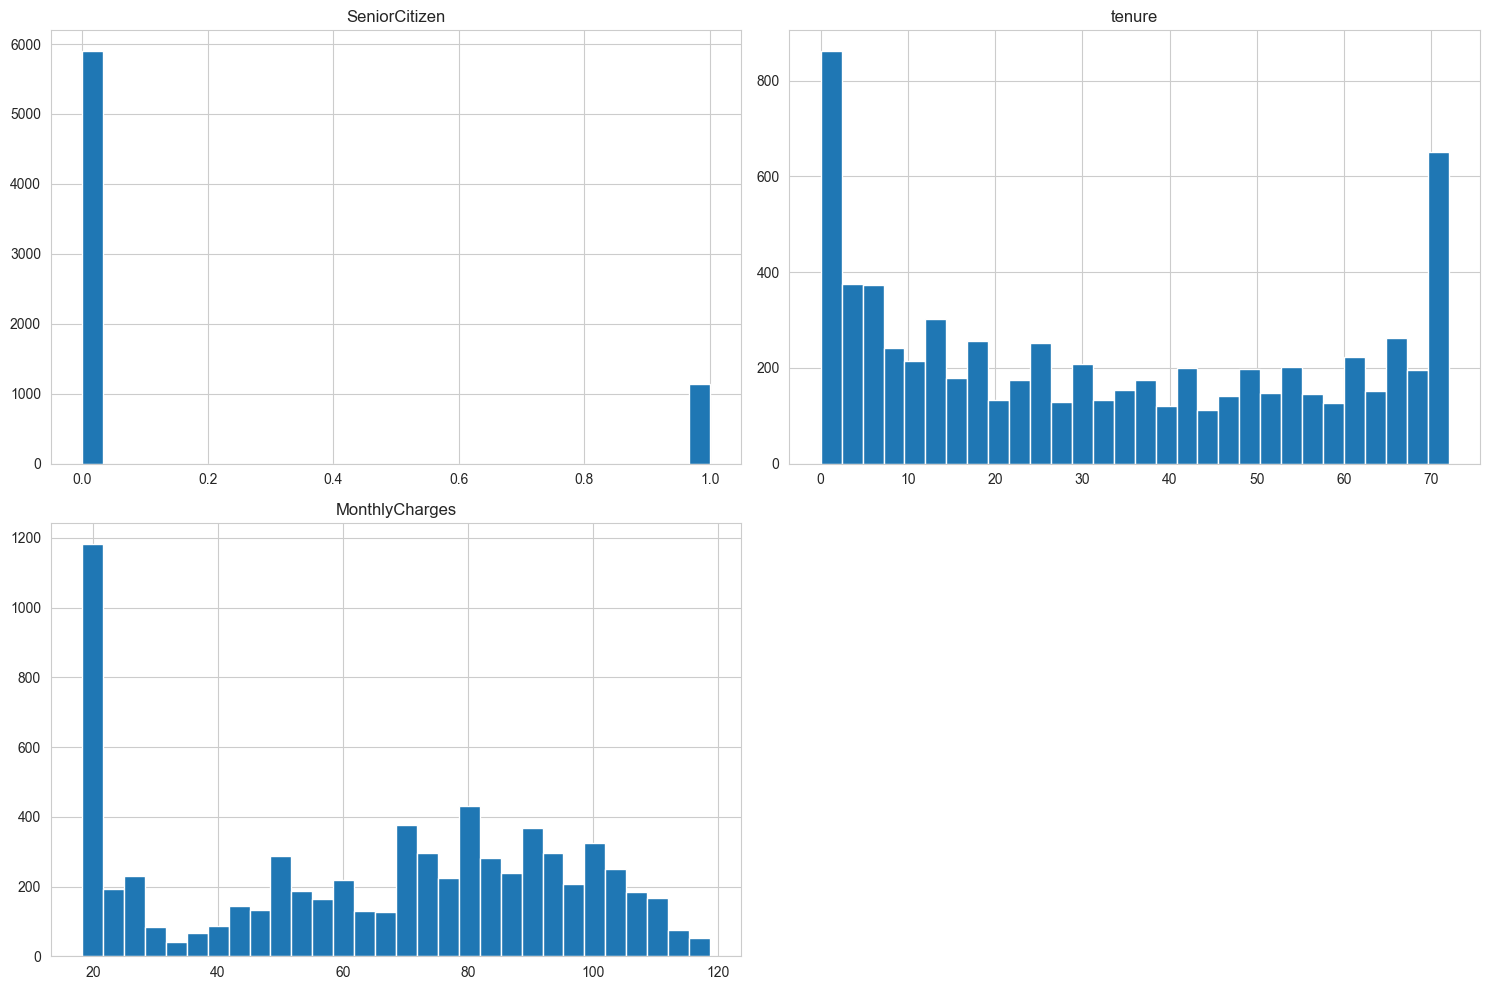

In [ ]:
# Analyze numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'customerID']

df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

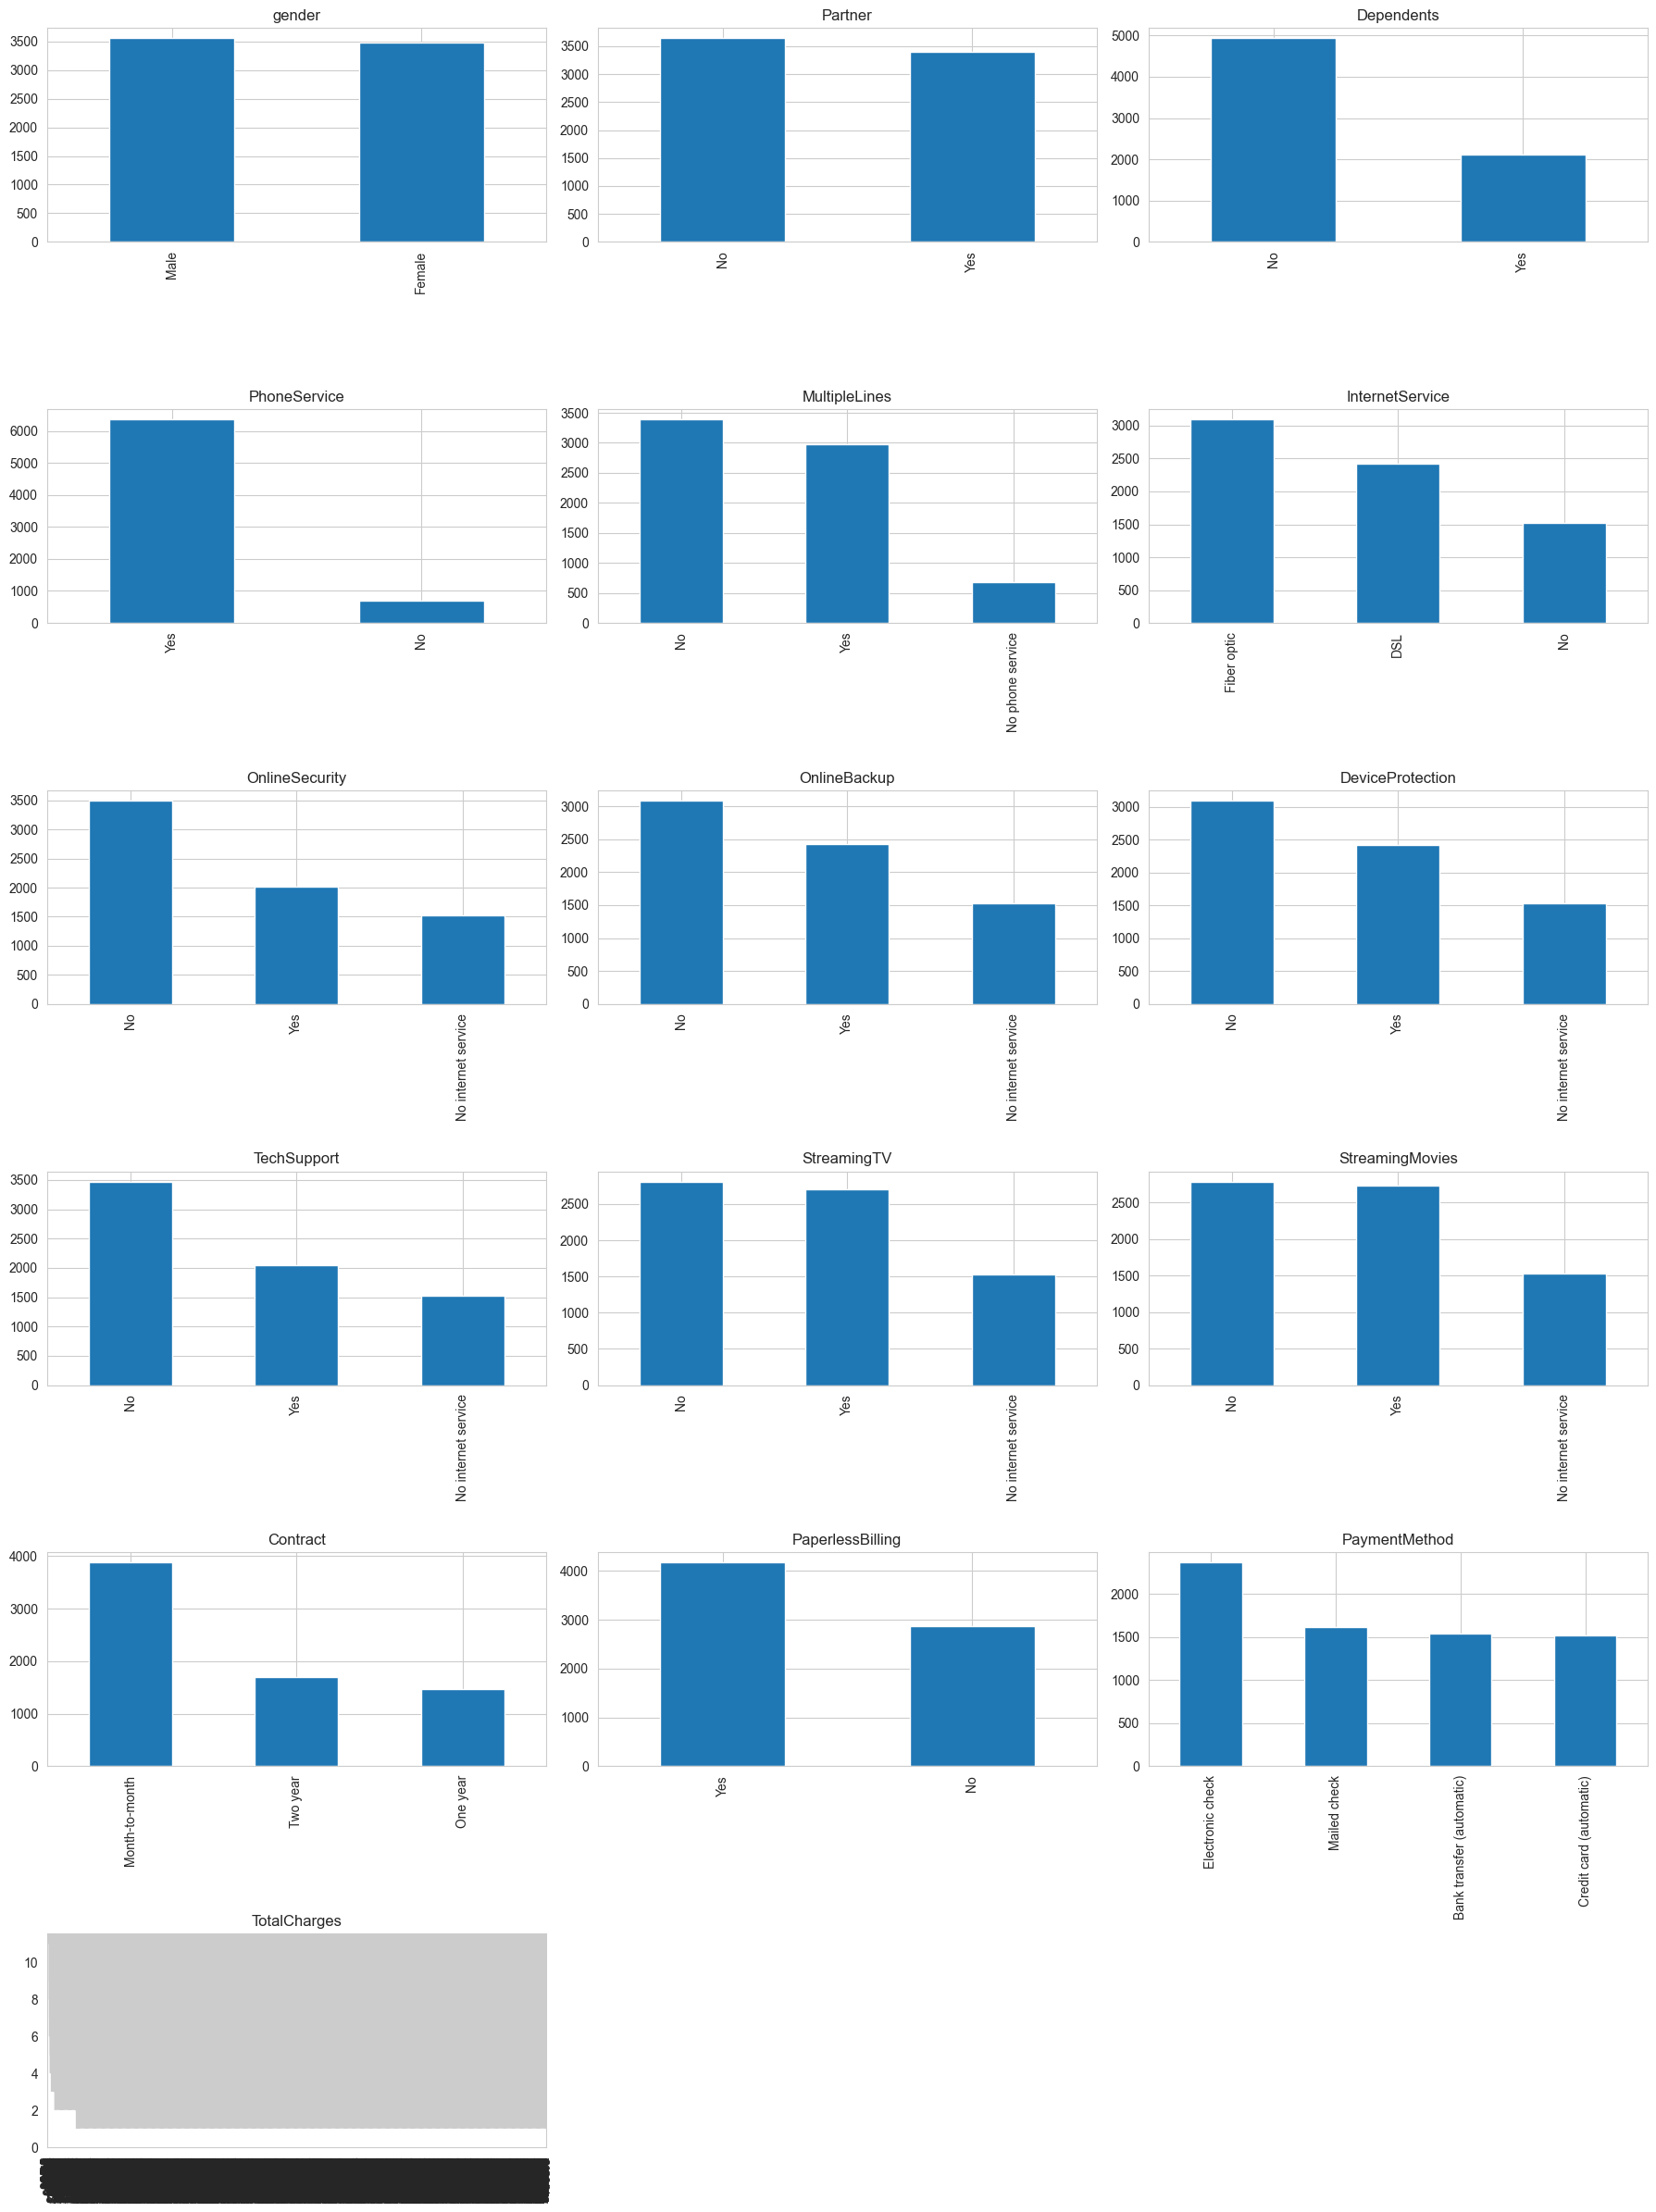

In [ ]:
# Analyze categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['customerID', 'Churn']]

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel('')
    
# Hide extra subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

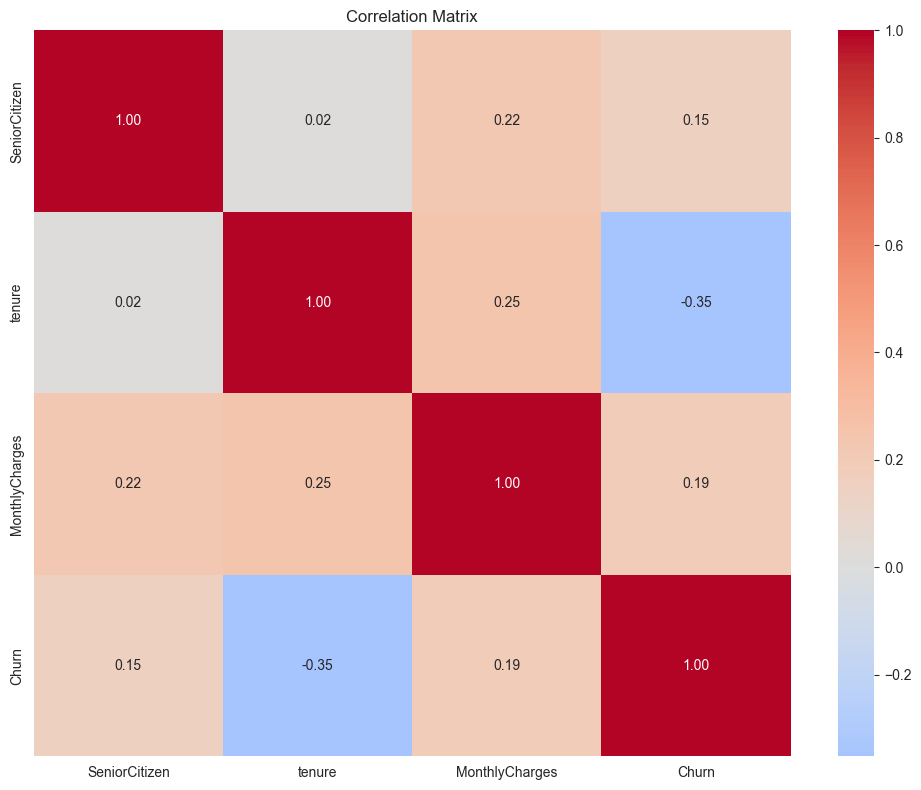


Correlation with Churn:
Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn, dtype: float64


In [ ]:
# Correlation matrix for numerical features
# First, encode Churn as binary
df_encoded = df.copy()
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Convert TotalCharges to numeric (it might be object due to spaces)
df_encoded['TotalCharges'] = pd.to_numeric(df_encoded['TotalCharges'], errors='coerce')

# Select numerical columns
numerical_cols_with_target = numerical_cols + ['Churn']
correlation_data = df_encoded[numerical_cols_with_target].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("\nCorrelation with Churn:")
print(correlation_data['Churn'].sort_values(ascending=False))

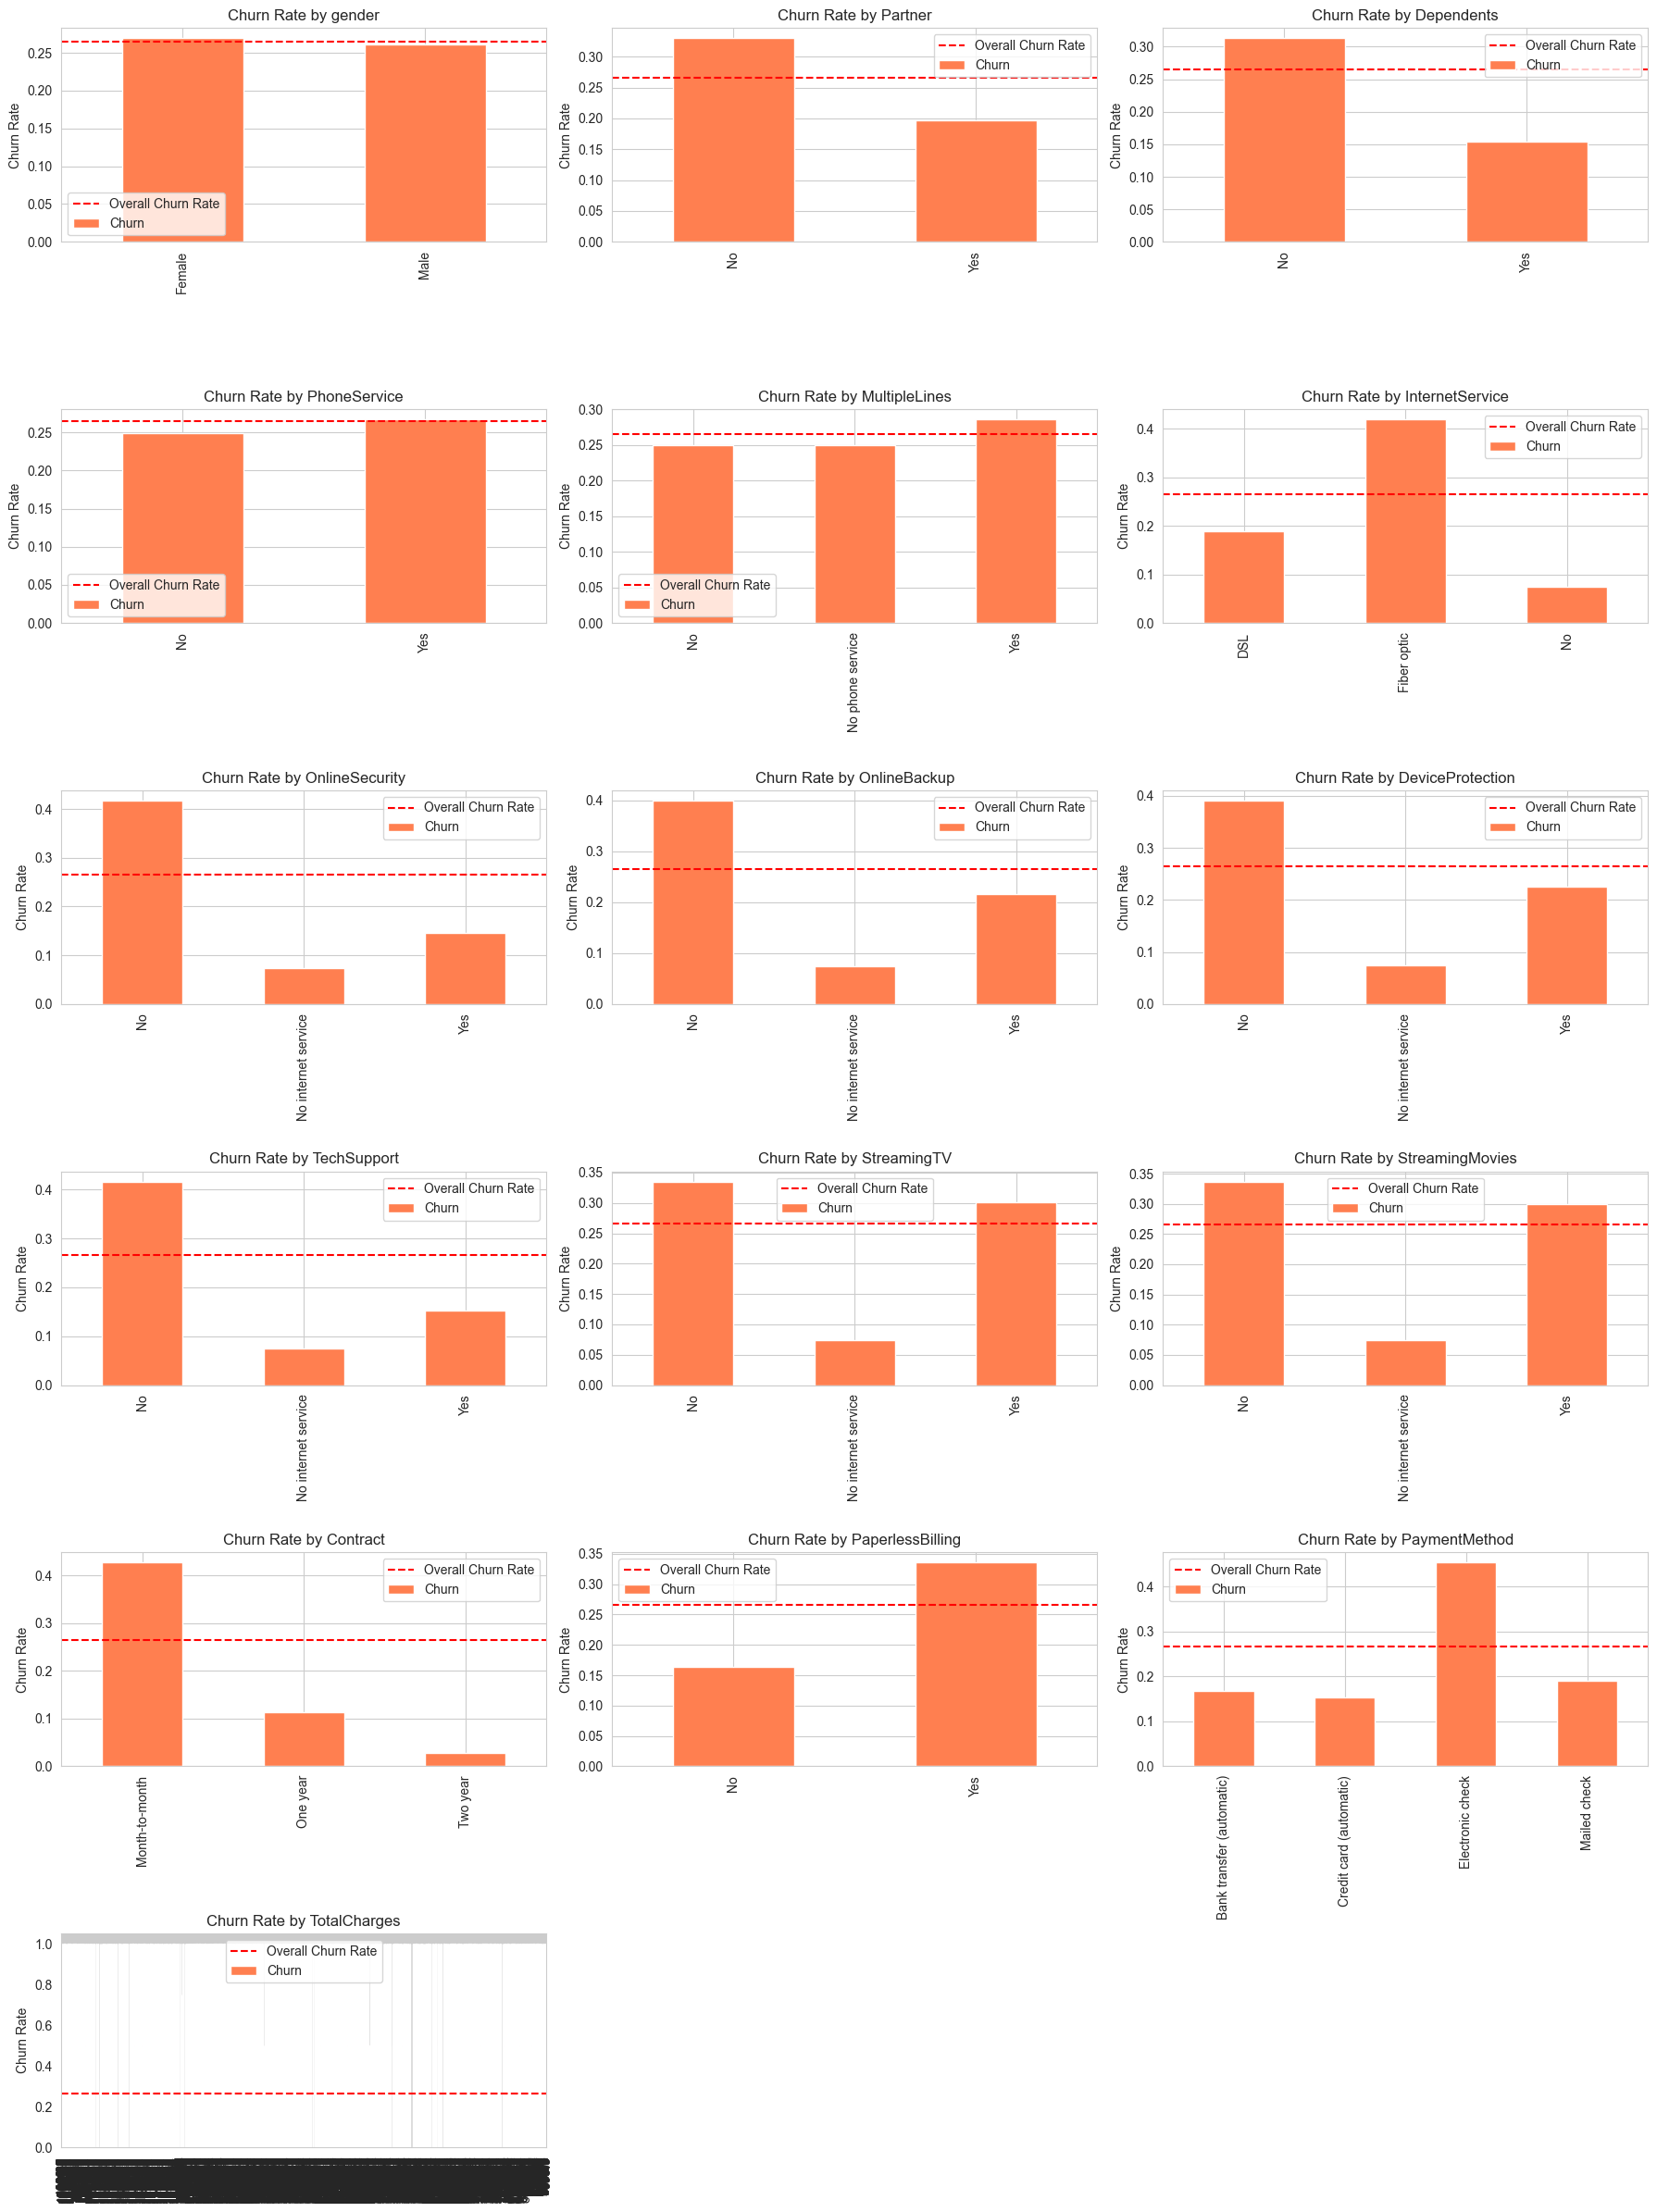

In [ ]:
# Analyze churn rate by categorical features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    churn_by_cat = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x))
    churn_by_cat.plot(kind='bar', ax=axes[idx], color='coral')
    axes[idx].set_title(f'Churn Rate by {col}')
    axes[idx].set_ylabel('Churn Rate')
    axes[idx].set_xlabel('')
    axes[idx].axhline(y=df['Churn'].value_counts(normalize=True)['Yes'], 
                      color='red', linestyle='--', label='Overall Churn Rate')
    axes[idx].legend()

for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## Key Findings from EDA

1. **Target Variable:**
   - Churn rate: ~26-27%
   - Imbalanced dataset - need to handle this

2. **Missing Values:**
   - Check TotalCharges for missing/space values

3. **Numerical Features:**
   - Tenure: Important predictor (longer tenure = less churn)
   - MonthlyCharges: Some correlation with churn
   - TotalCharges: Derived from tenure × monthly charges

4. **Categorical Features:**
   - Contract type: Month-to-month has highest churn
   - Internet service: Fiber optic users churn more
   - Payment method: Electronic check users churn more

5. **Next Steps:**
   - Clean TotalCharges column
   - Handle categorical encoding
   - Feature engineering (tenure groups, charge ratios)
   - Address class imbalance


# EDA Summary

## About the Data

### Dataset Overview
- **Source**: Telco Customer Churn Dataset
- **Size**: 7,043 rows × 21 columns
- **Memory Usage**: 6.82 MB
- **Purpose**: Predict customer churn for a telecommunications company

### Dataset Structure
- **Total Columns**: 21
- **Numerical Features**: 3
  - `SeniorCitizen` (int64): Binary indicator (0/1)
  - `tenure` (int64): Number of months customer has been with company
  - `MonthlyCharges` (float64): Monthly service charges
- **Categorical Features**: 18
  - Customer demographics: `gender`, `Partner`, `Dependents`
  - Service information: `PhoneService`, `MultipleLines`, `InternetService`
  - Add-on services: `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`
  - Contract details: `Contract`, `PaperlessBilling`, `PaymentMethod`
  - Financial: `TotalCharges` (stored as object, needs conversion)
  - Target: `Churn` (Yes/No)
  - Identifier: `customerID`

### Data Quality
- ✅ **No missing values** detected in the dataset
- ⚠️ **Data Type Issue**: `TotalCharges` is stored as object type (likely contains spaces or string values) and needs to be converted to numeric

---

## Key Findings and Insights

### 1. Target Variable Analysis

**Churn Distribution:**
- **No Churn**: 5,174 customers (73.46%)
- **Churn**: 1,869 customers (26.54%)
- **Overall Churn Rate**: ~26.5%

**Key Insight**: The dataset is **imbalanced** with a 73:27 ratio. This requires special handling during modeling:
- Use appropriate evaluation metrics (F1-score, ROC-AUC, Precision-Recall curve)
- Consider class balancing techniques (SMOTE, undersampling, or class weights)
- Stratified sampling for train-test splits

---

### 2. Numerical Features Analysis

#### Tenure
- **Correlation with Churn**: -0.35 (strongest negative correlation)
- **Insight**: Longer tenure customers are significantly less likely to churn
- **Implication**: Customer loyalty and retention programs are effective; focus on early-stage customer retention

#### MonthlyCharges
- **Correlation with Churn**: +0.19 (moderate positive correlation)
- **Insight**: Higher monthly charges are associated with higher churn rates
- **Implication**: Price sensitivity exists; need to balance pricing with value proposition

#### SeniorCitizen
- **Correlation with Churn**: +0.15 (moderate positive correlation)
- **Insight**: Senior citizens have a slightly higher churn tendency
- **Implication**: May need specialized retention strategies for this demographic

#### TotalCharges
- **Relationship**: Derived from tenure × monthly charges
- **Status**: Needs data cleaning (currently stored as object type)
- **Action Required**: Convert to numeric and handle any missing/space values

---

### 3. Categorical Features Analysis

#### Contract Type
- **Key Finding**: Month-to-month contracts have the **highest churn rate**
- **Insight**: Long-term contracts (1-year, 2-year) provide better retention
- **Implication**: Incentivize longer contract commitments

#### Internet Service
- **Key Finding**: Fiber optic users have **higher churn rates** than DSL or no internet service
- **Insight**: Despite being a premium service, fiber optic customers may have higher expectations or face service issues
- **Implication**: Review service quality and customer satisfaction for fiber optic customers

#### Payment Method
- **Key Finding**: Electronic check users have **significantly higher churn rates**
- **Insight**: Payment method convenience and reliability matter
- **Implication**: Encourage automated payment methods (credit card, bank transfer)

#### Other Service Features
- Add-on services (OnlineSecurity, TechSupport, etc.) likely show protective effects against churn
- Customers with multiple services may have lower churn (bundling effect)

---

### 4. Data Preprocessing Requirements

1. **TotalCharges Column**
   - Convert from object to numeric
   - Handle missing/space values (likely for new customers with 0 tenure)
   - Impute or calculate based on tenure × monthly charges

2. **Categorical Encoding**
   - Apply appropriate encoding (one-hot, label, or target encoding)
   - Handle binary categoricals efficiently

3. **Feature Engineering Opportunities**
   - Create tenure groups/bins (e.g., 0-12, 13-24, 25-36, 37+ months)
   - Calculate charge ratios (monthly charges / total charges)
   - Create service bundle indicators
   - Derive customer lifetime value proxies

4. **Class Imbalance Handling**
   - Implement SMOTE or other oversampling techniques
   - Use class weights in models
   - Consider ensemble methods that handle imbalance well

---

### 5. Modeling Recommendations

1. **Feature Selection**: Focus on high-impact features:
   - Tenure (strongest predictor)
   - Contract type
   - Payment method
   - Internet service type
   - Monthly charges

2. **Model Evaluation**: Use metrics appropriate for imbalanced data:
   - F1-score
   - ROC-AUC
   - Precision-Recall AUC
   - Confusion matrix with focus on recall for churn class

3. **Model Types to Consider**:
   - Tree-based models (Random Forest, XGBoost, LightGBM) - handle non-linear relationships well
   - Logistic Regression with regularization - for interpretability
   - Ensemble methods - to improve performance

---

### 6. Business Insights

1. **Retention Strategy**: Focus on customers in their first year (highest churn risk)
2. **Contract Incentives**: Promote longer-term contracts to reduce churn
3. **Payment Optimization**: Encourage automated payment methods
4. **Service Quality**: Investigate fiber optic service quality and customer satisfaction
5. **Value Proposition**: Review pricing strategy for high monthly charge customers
